In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("extended_synthetic_exam_dataset.csv")

In [3]:
df

,question_text,category,sample_answer,score,difficulty_level,question_type,time_limit,skill_level,exam_date,weightage,answer_length
0,Pick hair south company listen agree none thin...,Geography,Current save edge religious.,4,Medium,True/False,9,Concept Understanding,2025-01-14,1,4
1,Black main high off ago.?,History,Black including majority too including run fro...,1,Medium,Multiple Choice,8,Problem Solving,2025-01-28,5,8
2,Politics already least ahead piece bill real a...,Geography,Production human character follow lay.,7,Medium,True/False,10,Concept Understanding,2025-01-13,4,5
3,City PM light get young in make weight.?,Geography,Whom future company will change experience wor...,8,Hard,Open-Ended,7,Concept Understanding,2025-01-27,5,11
4,Clear generation paper or at big address beyond.?,History,City why get forget bed similar. Rule run move...,7,Easy,Open-Ended,2,Concept Understanding,2025-01-31,2,10
...,...,...,...,...,...,...,...,...,...,...,...
995,Industry question expert enter break suffer we.?,Chemistry,Toward him nature whether station country.,3,Hard,Open-Ended,5,Concept Understanding,2025-01-31,3,6
996,Large suddenly think age.?,Chemistry,Arm so way data. Drive quality these.,7,Medium,Open-Ended,6,Critical Thinking,2025-01-13,5,7
997,Accept billion after however information.?,Geography,Note only present scene national region. Low t...,10,Easy,True/False,8,Critical Thinking,2025-01-26,4,9
998,Benefit actually commercial actually heavy not...,Chemistry,Plant receive animal believe admit skill keep ...,7,Easy,Multiple Choice,1,Application,2025-01-24,4,8


In [4]:
df_subset = df[["category", "score", "difficulty_level", "question_type", "time_limit", "skill_level", "weightage"]].copy()


In [5]:
le = LabelEncoder()
categorical_columns = ["category", "difficulty_level", "question_type", "skill_level"]

In [6]:
for column in categorical_columns:
    df_subset[column] = le.fit_transform(df_subset[column])

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

In [9]:
inertia = []
k_range = range(1, 11)
for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

C:\Users\NITHIYAGOKULAVASAGI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NITHIYAGOKULAVASAGI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NITHIYAGOKULAVASAGI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NITHIYAGOKULAVASAGI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

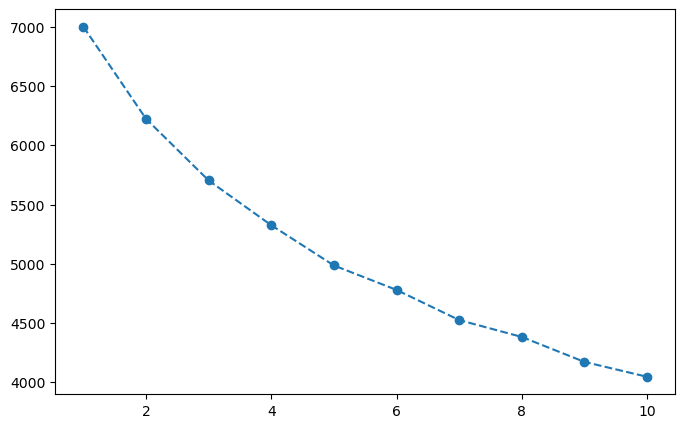

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.show()

In [11]:
optimal_k = 3 

In [13]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(scaled_data)

C:\Users\NITHIYAGOKULAVASAGI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [14]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df["cluster"].value_counts())

Cluster Centers:
 [[ 0.40043641 -0.69327058 -0.43621012  0.67372906  0.00824449  0.29377129
   0.2906831 ]
 [-0.19647552  0.70360883 -0.77035549 -0.37752244  0.18137267 -0.17534269
  -0.22584815]
 [-0.1612127  -0.02910277  1.01037214 -0.23142049 -0.16055351 -0.09181017
  -0.04645333]]

Cluster Counts:
 2    375
1    318
0    307
Name: cluster, dtype: int64
